#          Weather Forecast in Australia

#### 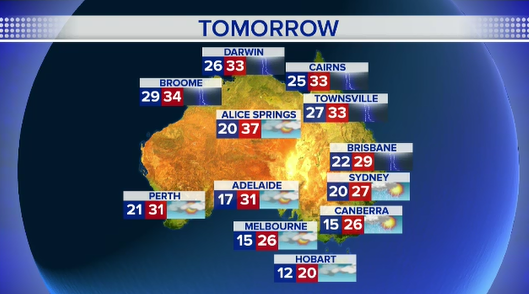

### Rationale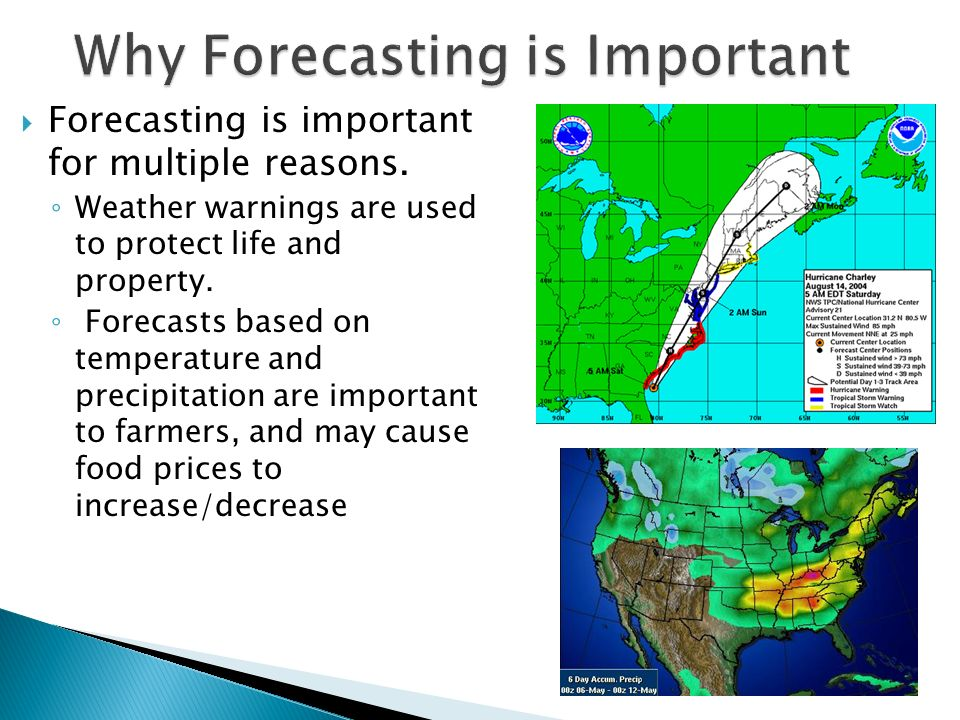

#### Presentation Requirements
There will be no slides for the presentation, you are just expected to submit your final Notebook upon the assigned deadline.
Your Presentation should be showcased within 5 - 7 minutes
You will receive Q&A session from the judges (optional)

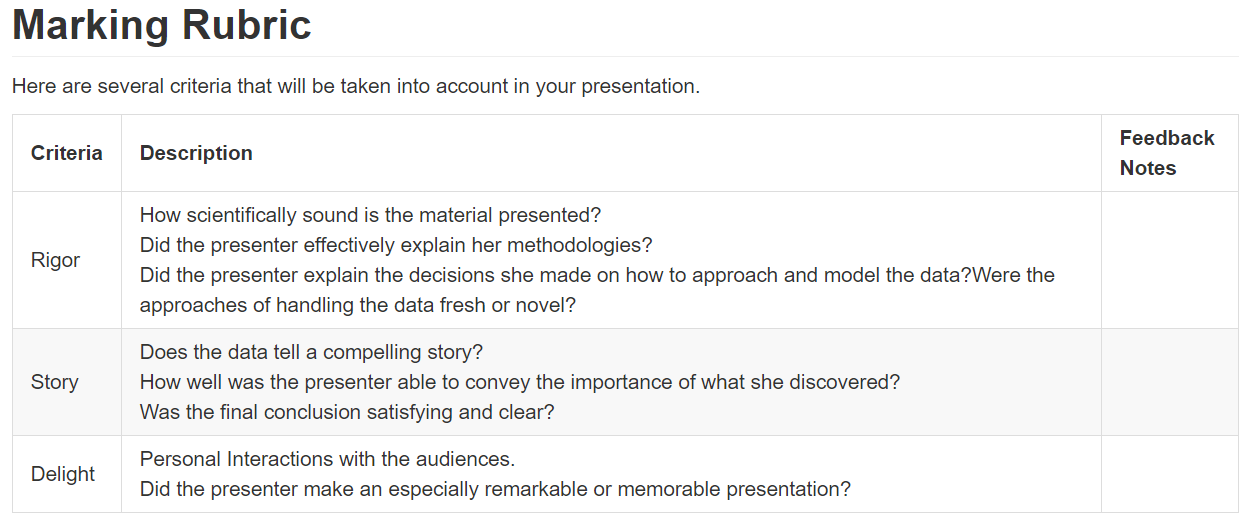

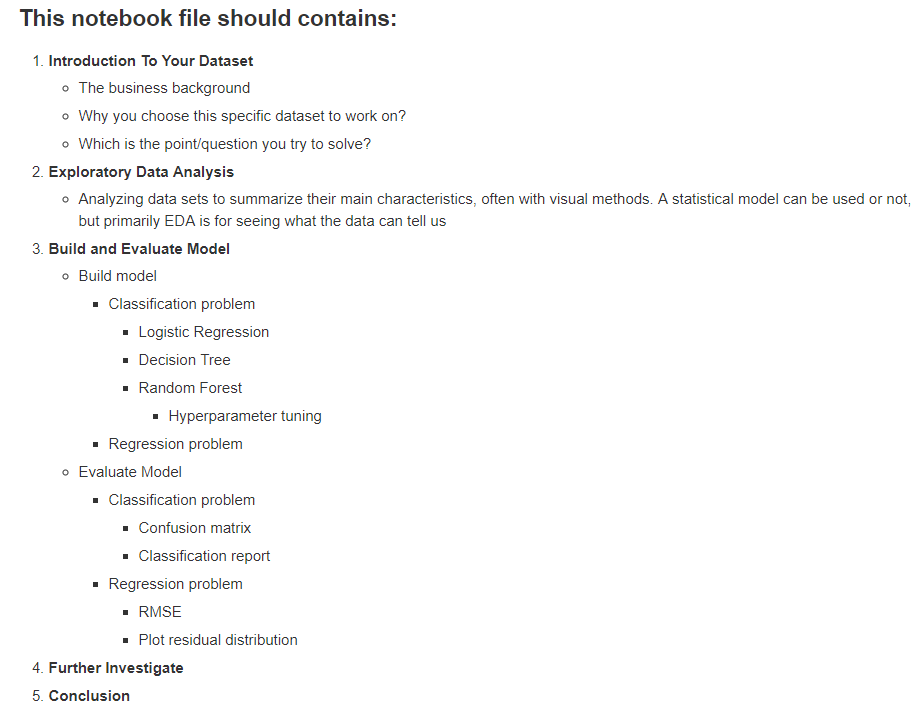

## 1. Preparing platform

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
#%matplotlib inline

## 2. Preparing data

In [6]:
#Reading data file
australia = pd.read_csv('./weatherAUS.csv')
australia.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am      ...      Humidity3pm  \
0           W           44.0          W      ...             22.0   
1         WNW           44.0        NNW      ...             25.0   
2         WSW           46.0          W      ...             30.0   
3          NE           24.0         SE      ...             16.0   
4           W           41.0        ENE      ...             33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RISK_MM  RainTomorrow  
0      0.0            No  
1      0.0            No  
2      0.0            No  
3      1.0            No  
4      0.2            No  

[5 rows x 24 columns]

In [7]:
# Drop unused variables
australia  = australia.drop(['Location','Date','Evaporation','Sunshine', 'Cloud9am','Cloud3pm',
                           'WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                           'WindSpeed3pm'], axis=1)

In [8]:
#Splitting Y and X
Y =  australia.RainTomorrow
X = australia.drop(['RainTomorrow'], axis=1)

Rain:  110316
Not Rain :  31877


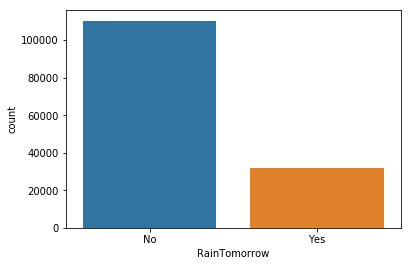

In [9]:
plot_sb = sb.countplot(Y, label='Total')
Rain, NotRain = Y.value_counts()
print('Rain: ',Rain)
print('Not Rain : ',NotRain)

In [10]:
# Changing boolen values and handling NaN values
X = X.replace({'No':0, 'Yes':1})
X = X.fillna(0)
Y = Y.replace({'No':0, 'Yes':1})
Y = Y.fillna(0)

In [11]:
# Scaling Data
X_scaled = (X - X.mean()) / (X.std())
X_scaled.head()

MinTemp   MaxTemp  Rainfall  Humidity9am  Humidity3pm  Pressure9am  \
0  0.196908 -0.038109 -0.204919     0.147682    -1.276563     0.297763   
1 -0.734690  0.267669 -0.276124    -1.174806    -1.140641     0.307321   
2  0.119275  0.351063 -0.276124    -1.468692    -0.914103     0.297434   
3 -0.455211  0.670739 -0.276124    -1.125825    -1.548408     0.330393   
4  0.833499  1.268396 -0.157450     0.686473    -0.778181     0.307981   

   Pressure3pm   Temp9am   Temp3pm  RainToday   RISK_MM  
0     0.303158  0.003099  0.070596   -0.53296 -0.278449  
1     0.305473  0.048475  0.404519   -0.53296 -0.278449  
2     0.308450  0.623231  0.257593   -0.53296 -0.278449  
3     0.322009  0.184601  0.698371   -0.53296 -0.160496  
4     0.299521  0.139226  1.125792   -0.53296 -0.254858

## Data Visualization

In [13]:
# Concatenate the target frame with just 20 columns from corpus_scaled
#X_plot = pd.concat([Y, X_scaled], axis=1) 
X_plot = pd.concat([Y, X_scaled.iloc[:,0:20]], axis=1) 

# Reshaping the frame
X_plot = pd.melt(X_plot, id_vars="RainTomorrow", var_name="Features", value_name='Values')
X_plot.head()

RainTomorrow Features    Values
0             0  MinTemp  0.196908
1             0  MinTemp -0.734690
2             0  MinTemp  0.119275
3             0  MinTemp -0.455211
4             0  MinTemp  0.833499

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

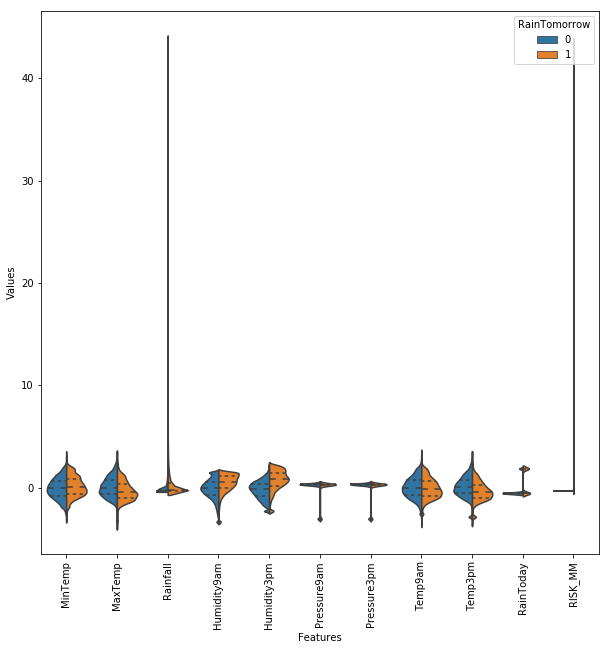

In [16]:
#Violin Plot

# Setting the plt object
plt.figure(figsize=(10,10))
# Setting the violinplot objetc with respecitve atributes
sb.violinplot(x="Features", y="Values", hue="RainTomorrow", data=X_plot, split=True, inner="quart")
# Rotation of x ticks
plt.xticks(rotation=90)

C:\Users\Quan\Anaconda3_2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


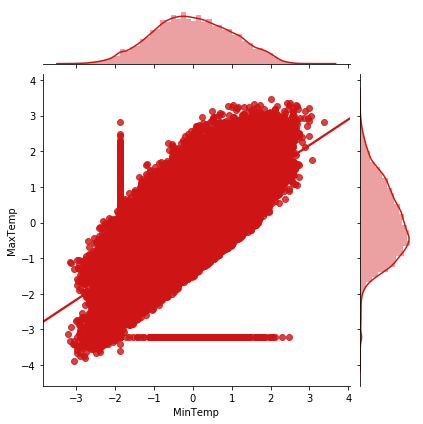

In [18]:
# Joint plot
# Correlation is taken from Pearsonr value, 1 is totally correlated.
sb.jointplot(X_scaled.loc[:,'MinTemp'], 
              X_scaled.loc[:,'MaxTemp'], kind="regg", color="#ce1414")

### Correlation Matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

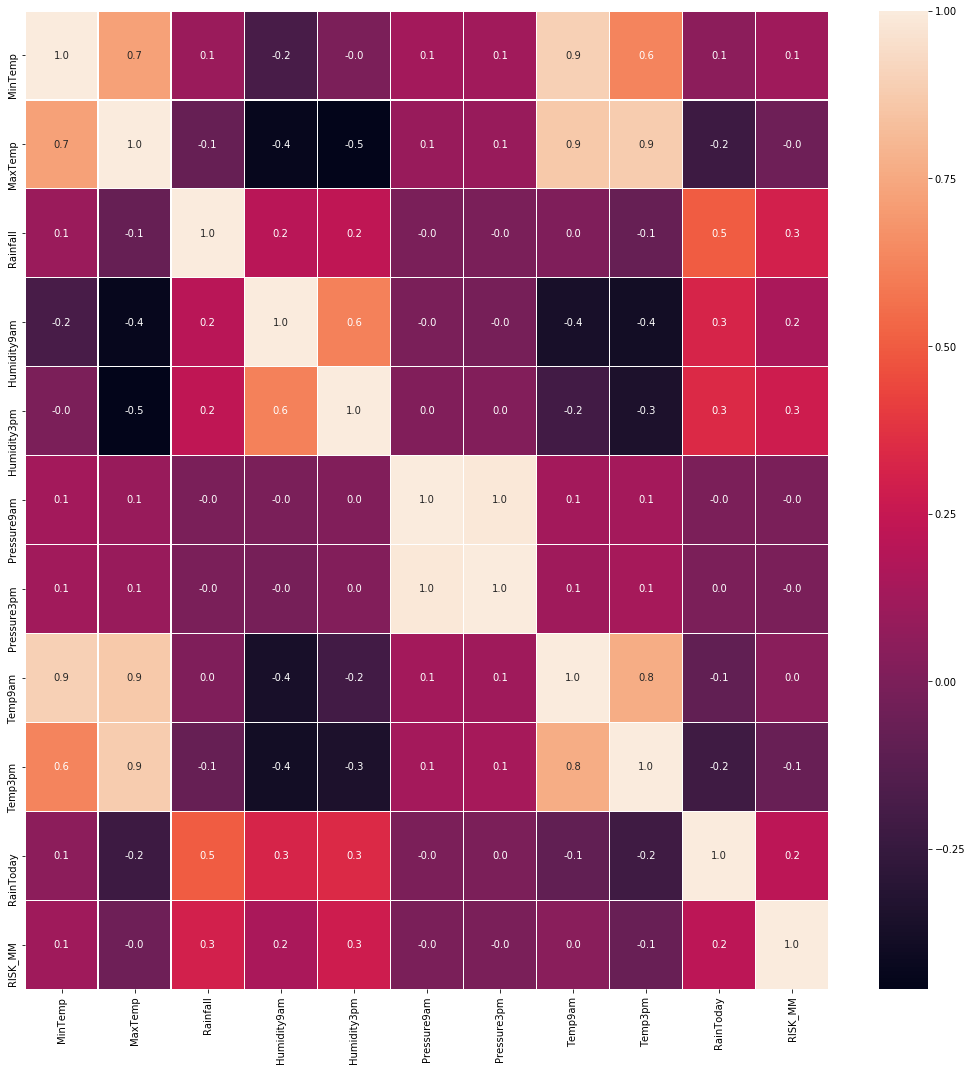

In [20]:
f, ax = plt.subplots(figsize=(18, 18))
sb.heatmap(X_scaled.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(rotation=90)

### Classification Algorithms

In [22]:
# Splitting train and test set
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=28)

### Random Forest

In [24]:
clf_rf = RandomForestClassifier(random_state=23)      
clr_rf = clf_rf.fit(x_train,y_train)

In [26]:
y_predict = clf_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_predict )
print('Accuracy: ', accuracy)


Accuracy:  0.9999437396269937


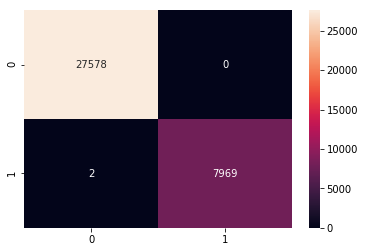

In [28]:
conf_matrix = confusion_matrix(y_test, y_predict)
sb.heatmap(conf_matrix, annot=True, fmt="d")

### Suppor Vector Machine (SVM)

In [30]:
clf_svm = SVC(kernel='linear', random_state=12)
clf_svm = clf_svm.fit(x_train, y_train)

In [32]:
y_predict = clf_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: ', accuracy)

Accuracy:  0.9998874792539875


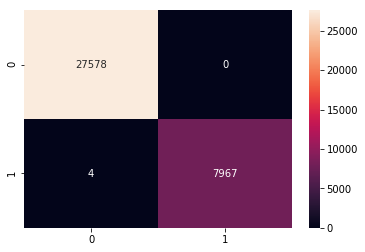

In [37]:
conf_matrix = confusion_matrix(y_test, y_predict)
sb.heatmap(conf_matrix, annot=True, fmt="d")

In [38]:
pip install flask


The following command must be run outside of the IPython shell:

    $ pip install flask

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [40]:
from flask import Flask

In [42]:
pip install flask


The following command must be run outside of the IPython shell:

    $ pip install flask

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [43]:
"../Weather focast/"

'../Weather focast/'

In [ ]:
import os

import pickle
import re

from flask import Flask, request, jsonify

from nltk.stem import PorterStemmer



In [ ]:

porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

# Unpickle the trained classifier and write preprocessor method used
def tokenizer(text):
    return text.split(' ')

def preprocessor(text):
    # Return a cleaned version of text
    
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))

    return text

# Uncomment this line after you trained your model and copied it to the same folder with app.py
tweet_classifier = None
try:
    with open('../data/logisticRegression.pkl', 'rb') as model:
        tweet_classifier = pickle.load(model)
except IOError:
    print("File not found!!")

app = Flask(__name__, static_folder='static')

@app.route('/')
def index():
    return app.send_static_file('html/index.html')


@app.route('/classify', methods=['POST'])
def classify():
    text = request.form.get('text', None)
    assert text is not None

    # Take this if-statement out and apply your model here
    if 'love' in text:
        prob_neg, prob_pos = 0.1, 0.9
    elif 'hate' in text:
        prob_neg, prob_pos = 0.9, 0.1
    else:
        prob_neg, prob_pos = 0.5, 0.5
    if tweet_classifier is not None:
        prob_neg, prob_pos = tweet_classifier.predict_proba([text])[0]
    s = 'Positive' if prob_pos >= prob_neg else 'Negative'
    p = prob_pos if prob_pos >= prob_neg else prob_neg
    return jsonify({
        'sentiment': s,
        'probability': p
    })

app.run()
